# Top Hits Spotify From 2000-2019
#### This document explores a dataset containing spotify data from 2000-2019



### a. Wrangling Process

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

%matplotlib inline

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [3]:
# load in the dataset into a pandas dataframe
songs = pd.read_csv('songs_normalize.csv')

In [5]:
songs.head()

artist                    song  duration_ms  explicit  year  \
0  Britney Spears  Oops!...I Did It Again       211160     False  2000   
1       blink-182    All The Small Things       167066     False  1999   
2      Faith Hill                 Breathe       250546     False  1999   
3        Bon Jovi            It's My Life       224493     False  2000   
4          *NSYNC             Bye Bye Bye       200560     False  2000   

   popularity  danceability  energy  key  loudness  mode  speechiness  \
0          77         0.751   0.834    1    -5.444     0       0.0437   
1          79         0.434   0.897    0    -4.918     1       0.0488   
2          66         0.529   0.496    7    -9.007     1       0.0290   
3          78         0.551   0.913    0    -4.063     0       0.0466   
4          65         0.614   0.928    8    -4.806     0       0.0516   

   acousticness  instrumentalness  liveness  valence    tempo         genre  
0        0.3000          0.000018    0.3550    0.894   95.053           pop  
1        0.0103          0.000000    0.6120    0.684  148.726     rock, pop  
2        0.1730          0.000000    0.2510    0.278  136.859  pop, country  
3        0.0263          0.000013    0.3470    0.544  119.992   rock, metal  
4        0.0408          0.001040    0.0845    0.879  172.656           pop

In [6]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [7]:
songs= songs.reindex(sorted(songs.columns), axis=1)

In [8]:
songs.sample(20)

acousticness              artist  danceability  duration_ms  energy  \
721       0.495000    Gym Class Heroes         0.584       237173   0.681   
1249      0.000238         Chris Brown         0.594       227973   0.841   
303       0.002490             Beyoncé         0.646       236133   0.770   
1779      0.184000        Hayden James         0.617       217296   0.558   
1377      0.407000         Miley Cyrus         0.530       221360   0.422   
827       0.001650  The Pussycat Dolls         0.671       245680   0.685   
1794      0.118000        Shawn Mendes         0.561       208733   0.674   
480       0.327000                Dido         0.512       240040   0.525   
1980      0.602000            Anuel AA         0.807       258800   0.803   
94        0.260000                 Joe         0.725       296693   0.487   
133       0.300000                Dido         0.725       218360   0.583   
1267      0.002340              Alesso         0.370       195480   0.823   
870       0.045100      The Ting Tings         0.755       310573   0.901   
1363      0.033100               Drake         0.794       174120   0.523   
942       0.018500          Soulja Boy         0.758       193386   0.712   
462       0.065300              J-Kwon         0.925       247106   0.741   
454       0.029800                T.I.         0.759       216706   0.891   
1941      0.150000              Polo G         0.772       166560   0.639   
1778      0.032300          Macklemore         0.731       220454   0.794   
1019      0.032700           Taio Cruz         0.607       201546   0.934   

      explicit                        genre  instrumentalness  key  liveness  \
721      False                 hip hop, pop          0.000000    1    0.2890   
1249     False            hip hop, pop, R&B          0.000002    1    0.1560   
303      False                     pop, R&B          0.000000    2    0.0715   
1779      True        pop, Dance/Electronic          0.000001   10    0.0911   
1377     False                          pop          0.000000    5    0.1070   
827      False                     pop, R&B          0.000000   11    0.3980   
1794     False                          pop          0.000000    4    0.1110   
480      False                          pop          0.000003    5    0.0810   
1980     False                        latin          0.008530   11    0.1360   
94       False                     pop, R&B          0.000011    8    0.4310   
133      False                          pop          0.000238    1    0.0665   
1267     False        pop, Dance/Electronic          0.000002    2    0.1740   
870      False  pop, rock, Dance/Electronic          0.037300    9    0.3630   
1363      True            hip hop, pop, R&B          0.000000    8    0.1560   
942       True                 hip hop, pop          0.000000    7    0.0677   
462       True                 hip hop, pop          0.000000    9    0.0440   
454       True                 hip hop, pop          0.000000   11    0.1410   
1941      True                      hip hop          0.000000    1    0.0698   
1778      True                 hip hop, pop          0.000026    0    0.1120   
1019     False                 hip hop, pop          0.000000    3    0.0909   

      loudness  mode  popularity  \
721     -5.084     0          59   
1249    -5.792     1          64   
303     -6.596     0          76   
1779    -7.046     0          47   
1377    -6.262     1          77   
827     -5.762     0          72   
1794    -4.882     0           0   
480     -6.823     1          44   
1980    -4.156     1          75   
94      -5.959     0          65   
133     -9.942     0          73   
1267    -6.245     1           0   
870     -3.152     1          51   
1363    -7.829     1          65   
942     -3.781     1          76   
462     -5.827     0          59   
454     -2.983     1          63   
1941    -7.119     1          78   
1778    -5.126     0   

In [9]:
songs.describe()

acousticness  danceability    duration_ms       energy  \
count   2000.000000   2000.000000    2000.000000  2000.000000   
mean       0.128955      0.667437  228748.124500     0.720366   
std        0.173346      0.140416   39136.569008     0.152745   
min        0.000019      0.129000  113000.000000     0.054900   
25%        0.014000      0.581000  203580.000000     0.622000   
50%        0.055700      0.676000  223279.500000     0.736000   
75%        0.176250      0.764000  248133.000000     0.839000   
max        0.976000      0.975000  484146.000000     0.999000   

       instrumentalness          key     liveness     loudness         mode  \
count       2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean           0.015226     5.378000     0.181216    -5.512435     0.553500   
std            0.087771     3.615059     0.140669     1.933482     0.497254   
min            0.000000     0.000000     0.021500   -20.514000     0.000000   
25%            0.000000     2.000000     0.088100    -6.490250     0.000000   
50%            0.000000     6.000000     0.124000    -5.285000     1.000000   
75%            0.000068     8.000000     0.241000    -4.167750     1.000000   
max            0.985000    11.000000     0.853000    -0.276000     1.000000   

        popularity  speechiness        tempo      valence        year  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.00000  
mean     59.872500     0.103568   120.122558     0.551690  2009.49400  
std      21.335577     0.096159    26.967112     0.220864     5.85996  
min       0.000000     0.023200    60.019000     0.038100  1998.00000  
25%      56.000000     0.039600    98.985750     0.386750  2004.00000  
50%      65.500000     0.059850   120.021500     0.557500  2010.00000  
75%      73.000000     0.129000   134.265500     0.730000  2015.00000  
max      89.000000     0.576000   210.851000     0.973000  2020.00000

In [10]:
sum(songs.duplicated())

59

In [11]:
songs.dtypes

acousticness        float64
artist               object
danceability        float64
duration_ms           int64
energy              float64
explicit               bool
genre                object
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
popularity            int64
song                 object
speechiness         float64
tempo               float64
valence             float64
year                  int64
dtype: object

# Observations
* Some column names can be more descriptive.
* The duplicated rows are from artiste with multiple songs, they therefore do not need to be cleaned.
* First alphabets of columns are not capitalized

### Cleaning
#### This dataset requires minimal cleaning.

In [12]:
songs.rename(columns={'explicit':'Explicit_Content', 'duration_ms ':'Song_Duration ','tempo':'Song_Pace'}, inplace = True)

In [13]:
songs.columns = songs.columns.str.upper()

In [14]:
songs.head()

ACOUSTICNESS          ARTIST  DANCEABILITY  DURATION_MS  ENERGY  \
0        0.3000  Britney Spears         0.751       211160   0.834   
1        0.0103       blink-182         0.434       167066   0.897   
2        0.1730      Faith Hill         0.529       250546   0.496   
3        0.0263        Bon Jovi         0.551       224493   0.913   
4        0.0408          *NSYNC         0.614       200560   0.928   

   EXPLICIT_CONTENT         GENRE  INSTRUMENTALNESS  KEY  LIVENESS  LOUDNESS  \
0             False           pop          0.000018    1    0.3550    -5.444   
1             False     rock, pop          0.000000    0    0.6120    -4.918   
2             False  pop, country          0.000000    7    0.2510    -9.007   
3             False   rock, metal          0.000013    0    0.3470    -4.063   
4             False           pop          0.001040    8    0.0845    -4.806   

   MODE  POPULARITY                    SONG  SPEECHINESS  SONG_PACE  VALENCE  \
0     0          77  Oops!...I Did It Again       0.0437     95.053    0.894   
1     1          79    All The Small Things       0.0488    148.726    0.684   
2     1          66                 Breathe       0.0290    136.859    0.278   
3     0          78            It's My Life       0.0466    119.992    0.544   
4     0          65             Bye Bye Bye       0.0516    172.656    0.879   

   YEAR  
0  2000  
1  1999  
2  1999  
3  2000  
4  2000

### Analysis And Visualization
#### Univariate Exploration
#### Top 10 Most Popular Songs¶

In [15]:
top_5_songs = songs.sort_values(by ='POPULARITY',ascending = False)
top_5_songs[['SONG','POPULARITY']].head(5);

In [16]:
top_5_songs.head(5)

ACOUSTICNESS             ARTIST  DANCEABILITY  DURATION_MS  ENERGY  \
1322       0.04950  The Neighbourhood         0.612       240400   0.807   
1311       0.69500          Tom Odell         0.445       244360   0.537   
201        0.00286             Eminem         0.908       290320   0.669   
1613       0.03710             WILLOW         0.764       196520   0.705   
6          0.03020             Eminem         0.949       284200   0.661   

      EXPLICIT_CONTENT                       GENRE  INSTRUMENTALNESS  KEY  \
1322             False                   rock, pop          0.017700   10   
1311              True                         pop          0.000017    4   
201               True                     hip hop          0.000000    7   
1613             False  pop, R&B, Dance/Electronic          0.000019    3   
6                 True                     hip hop          0.000000    5   

      LIVENESS  LOUDNESS  MODE  POPULARITY                 SONG  SPEECHINESS  \
1322    0.1010    -2.810     1          89      Sweater Weather       0.0336   
1311    0.0944    -8.532     0          88         Another Love       0.0400   
201     0.2370    -2.827     1          87           Without Me       0.0738   
1613    0.0943    -5.279     0          86       Wait a Minute!       0.0278   
6       0.0454    -4.244     0          86  The Real Slim Shady       0.0572   

      SONG_PACE  VALENCE  YEAR  
1322    124.053    0.398  2013  
1311    122.769    0.131  2013  
201     112.238    0.662  2002  
1613    101.003    0.672  2015  
6       104.504    0.760  2000

## Observation
### The top 5 most popular song on Spotify between 2000-2019 are:
1. The Neighbourhood-Sweater Weather	
2. Tom Odell-Another Love	
3. Eminem-Without Me
4. WILLOW-Wait a Minute!	
5. Eminem-The Real Slim Shady

### Top 10 Most Popular Genres From 2000-2019

In [17]:
top_10_song_gen = songs.sort_values(by ='POPULARITY',ascending = False)
top_10_song_gen[['SONG','GENRE']].head(10);

## 1. Scatterplot of The most popular music genres

In [18]:
top_10_music_genres = songs[["POPULARITY", "SONG", "GENRE", "YEAR"]].sort_values(["POPULARITY"], ascending=False)[:10]
top_10_music_genres
fig = px.scatter(top_10_music_genres, y= 'SONG', x='POPULARITY', hover_data = top_10_music_genres[['GENRE', 'YEAR']], color='GENRE',
                 title = "Top 10 MOST POPULAR MUSIC GENRES FROM 2000-2019")
fig.show()

## Observation
### Rock, pop is the most popular genre

### 2. Scatterplot of The most popular music genres

<AxesSubplot:ylabel='GENRE'>

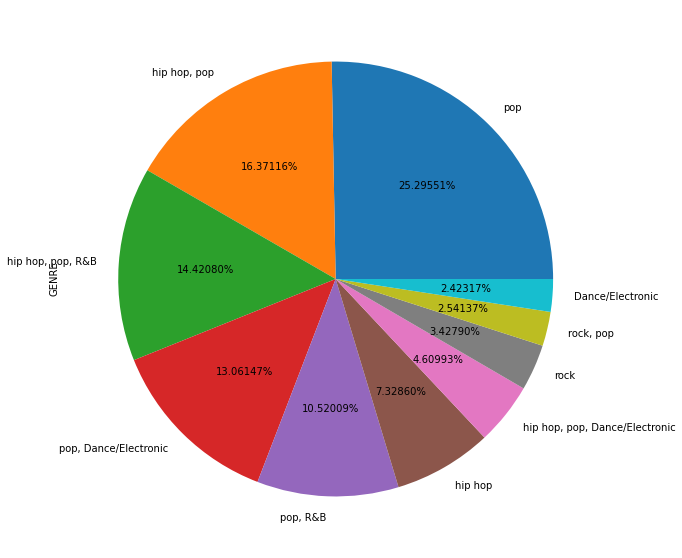

In [17]:
#Genre pie chart 
songs['GENRE'].value_counts().head(10).plot.pie(figsize=(15,10), autopct='%1.5f%%')

## Observation
#### Pop is the most repititive genre.

### 3. Scatterplot of the least popular genres

In [18]:
#top 10 least popular genres
top_10_least = songs.sort_values(by = 'POPULARITY', ascending = True).head(10)
top_10_least

ACOUSTICNESS                  ARTIST  DANCEABILITY  DURATION_MS  ENERGY  \
860        0.09960            Mariah Carey         0.715       204733   0.665   
1626       0.00451             Cheat Codes         0.510       228361   0.692   
1617       0.08200                Astrid S         0.672       208728   0.589   
778        0.08470               Jim Jones         0.685       236080   0.800   
1750       0.00402          Kendrick Lamar         0.636       185946   0.517   
1751       0.50100  A Boogie Wit da Hoodie         0.839       209269   0.810   
1922       0.67500                   Mabel         0.631       169813   0.803   
1602       0.83500           Justin Bieber         0.609       233720   0.378   
1600       0.16500              The Weeknd         0.681       230453   0.594   
835        0.01490             Miley Cyrus         0.692       190453   0.911   

      EXPLICIT_CONTENT                        GENRE  INSTRUMENTALNESS  KEY  \
860              False                     pop, R&B          0.000000    4   
1626             False        pop, Dance/Electronic          0.000000    0   
1617             False  rock, pop, Dance/Electronic          0.000000    7   
778               True                 hip hop, pop          0.000000    1   
1750              True                      hip hop          0.000000    0   
1751              True                      hip hop          0.000000    5   
1922             False        pop, Dance/Electronic          0.000000    0   
1602             False                          pop          0.000000    4   
1600              True                     pop, R&B          0.000003    7   
835              False                          pop          0.000073    9   

      LIVENESS  LOUDNESS  MODE  POPULARITY                          SONG  \
860     0.2240    -7.736     0           0                 Touch My Body   
1626    0.1380    -5.825     1           0                           Sex   
1617    0.0962    -5.008     0           0                 Hurts So Good   
778     0.0920    -6.564     1           0                   We Fly High   
1750    0.0874    -6.759     1           0                          DNA.   
1751    0.1170    -5.274     0           0  Drowning (feat. Kodak Black)   
1922    0.1100    -2.974     0           0                      Mad Love   
1602    0.2800    -9.828     1           0                 Love Yourself   
1600    0.1340    -7.028     1           0                       Starboy   
835     0.1120    -5.098     0           0                 See You Again   

      SPEECHINESS  SONG_PACE  VALENCE  YEAR  
860        0.0502     78.502    0.840  2008  
1626       0.1710    102.420    0.209  2016  
1617       0.0490    120.036    0.379  2016  
778        0.2980    120.226    0.483  2006  
1750       0.3600    139.928    0.394  2017  
1751       0.0568    129.014    0.814  2017  
1922       0.1550    198.065    0.620  2019  
1602       0.4380    100.418    0.515  2015  
1600       0.2820    186.054    0.535  2016  
835        0.1770    138.975    0.801  2007

In [19]:
top_10 = songs[["POPULARITY", "SONG", "GENRE", "YEAR"]].sort_values(["POPULARITY"], ascending=True)[:10]
top_10
fig = px.scatter(top_10, y= 'SONG', x='POPULARITY', hover_data = top_10[['GENRE', 'YEAR']], color='GENRE',
                 title = "Top 10 Least Popular Genres")
fig.show()

## Observation
pop, R&B is the least popular genre

### 4. Average time of Songs

In [20]:
#Average time of songs
px.box(data_frame=songs, y='DURATION_MS',color='GENRE')

## Observation
The average time of a song varies within genre

### 5. Most Frequent Artist

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



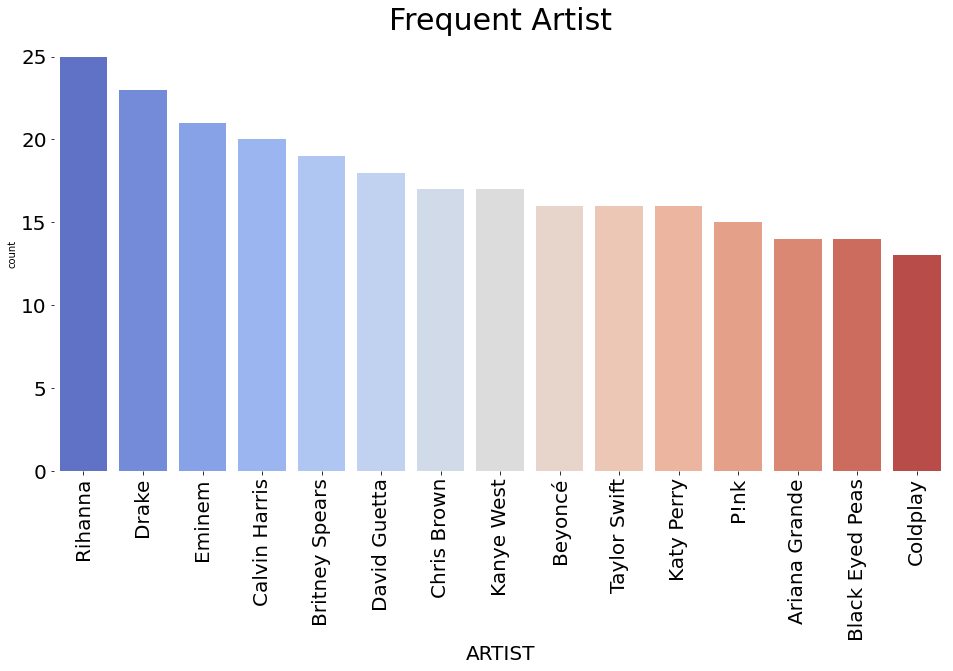

In [21]:
#Most Frequent Artist 
plt.figure(figsize=(16,8))
plt.title("Frequent Artist", fontsize=30)

plt.xlabel('COUNT', fontsize=20)
plt.xlabel('ARTIST', fontsize=20)

sns.countplot(songs.ARTIST, order=pd.value_counts(songs.ARTIST).iloc[:15].index, palette=sns.color_palette("coolwarm", 15))

plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.despine(bottom=True, left=True)
plt.show()

## Observation
Rihanna is the most frequent artist

### 6.  Most Popular Artist By Song 

In [22]:
top_10_artist = songs.sort_values(by ='POPULARITY',ascending = False)
top_10_artist[['SONG','ARTIST']].head(10);

In [21]:
top_10_artist = songs[["POPULARITY", "SONG", "ARTIST", "YEAR"]].sort_values(["POPULARITY"], ascending=False)[:10]
top_10_artist
fig = px.scatter(top_10_artist, y= 'SONG', x='POPULARITY', hover_data = top_10_artist[['ARTIST', 'YEAR']], color='ARTIST',
                 title = "Top 10 MOST POPULAR ARTISTS FROM 2000-2019")
fig.show()

## Observation
The artist with the most popular song is The Neighbourhood

### 7. Least Popular Artists By Song

In [24]:
least_10_artist = songs.sort_values(by ='POPULARITY',ascending = False)
least_10_artist[['SONG','ARTIST']].head(10);

In [22]:
fig = px.histogram(data_frame=songs, x="ARTIST",y="POPULARITY",title="Artist Popularity",opacity=0.8)
fig.show()

### 8. Duration Of Songs

In [23]:
fig = px.bar(data_frame=songs, x="DURATION_MS", title="Duration of Song")
fig.show()

### 9. Energy and Acoustic 

In [26]:
#Energy and acoustic line plot
sns.lineplot(x="ENERGY", y= "ACOUSTICNESS", data= songs)

<AxesSubplot:xlabel='ENERGY', ylabel='ACOUSTICNESS'>

### 10. Jointplot for Valence and Popularity

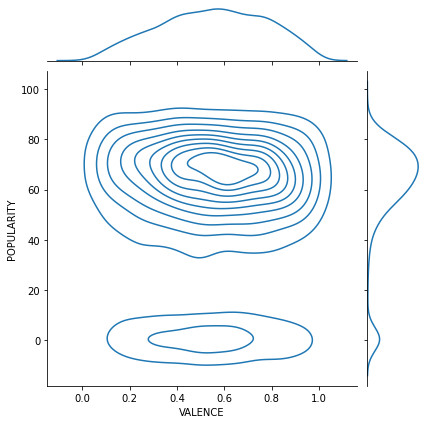

In [28]:
sns.jointplot(x=songs.VALENCE, y=songs.POPULARITY, data=songs, kind="kde");

## Multivariate Exlporation

### 11. Correlation Heat Map

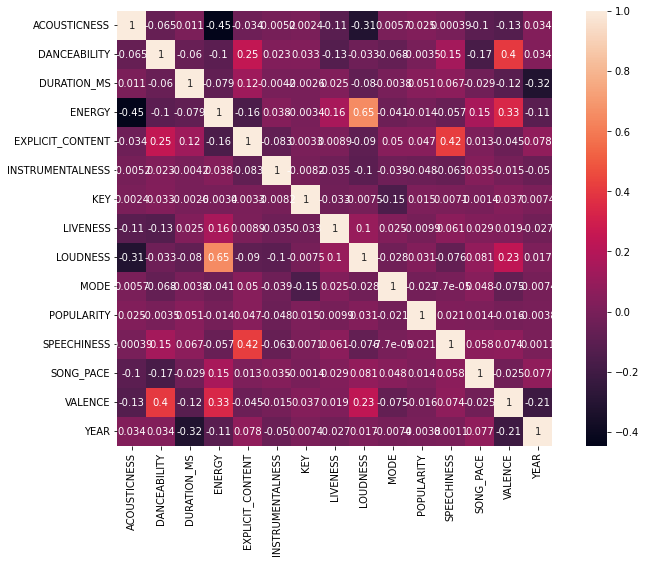

In [29]:
plt.subplots(figsize=(12, 8))
sns.heatmap(songs.corr(), annot= True, square=True)
plt.show()

### 12. Popularity Of Songs Based On Genres

In [24]:
px.box(songs, x='EXPLICIT_CONTENT', y='POPULARITY', color='EXPLICIT_CONTENT', template='plotly_dark', color_discrete_sequence=['cyan','magenta'], title='Popularity Based On Explicit Content')

### 13. Songs With Explicit Content

In [25]:
fig=px.pie(songs.groupby('EXPLICIT_CONTENT', as_index=False).count().sort_values(by='SONG', ascending=False), names='EXPLICIT_CONTENT', values='SONG', labels={'SONG':'Total Songs'}, hole=.6, color_discrete_sequence=['green', 'crimson'], template= 'plotly_dark', title='Songs With Explicit Content')
fig.update_layout(title_x=0.5)

## Observation
Most songs do not have explicit content

### 14. Yearly Song Collection

In [26]:
fig=px.area(songs.groupby('YEAR', as_index=False).count().sort_values(by='SONG', ascending=False).sort_values(by='YEAR'), x='YEAR', y='SONG', markers=True,labels={'SONG':'Total Songs'}, color_discrete_sequence=['green'], title='Year by Year Song Collection')
fig.update_layout(hovermode= 'x', title_x=0.5) 

### 15. TreeMap Of Artists Playlist

In [27]:
fig=px.treemap(songs, path=[px.Constant('Singer'), 'ARTIST','GENRE','SONG'], values='POPULARITY', title='TreeMap Of Artists Playlist')
fig.update_traces(root_color='lightgreen')
fig.update_layout(title_x=0.5)

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\user\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

